<a href="https://colab.research.google.com/github/esosa09/Netflix-Rating-Analysis/blob/main/NetflixRatingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving netflix_titles[1].csv to netflix_titles[1] (1).csv


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("netflix_titles[1].csv")

#print("Original shape:", df.shape)
#print(df.info())
#print(df.head(3))


df.drop(columns=['show_id', 'title', 'description', 'cast'], inplace=True)

# 2. handle missing values
for col in ['director', 'country', 'rating', 'date_added']:
    df[col] = df[col].fillna('Unknown')

# 3. convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 4. extract numeric duration
df['duration'] = df['duration'].str.extract(r'(\d+)').astype(float)

# 5. extract year and drop full date
df['year_added'] = df['date_added'].dt.year
df.drop(columns=['date_added'], inplace=True)

# 6. pick 4 rating categories
categories = ['TV-MA', 'TV-14', 'PG', 'R']
df = df[df['rating'].isin(categories)]

le = LabelEncoder()
for col in ['type', 'country', 'rating', 'listed_in', 'director']:
    df[col] = le.fit_transform(df[col].astype(str))

df.to_csv("netflix_cleaned.csv", index=False)

print(df.info())
print(df['rating'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 6453 entries, 1 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          6453 non-null   int64  
 1   director      6453 non-null   int64  
 2   country       6453 non-null   int64  
 3   release_year  6453 non-null   int64  
 4   rating        6453 non-null   int64  
 5   duration      6453 non-null   float64
 6   listed_in     6453 non-null   int64  
 7   year_added    6402 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 453.7 KB
None
[3 0 2 1]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

numeric_df = df.select_dtypes(include='number')


X = numeric_df.drop(columns=['rating'])
y = numeric_df['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110)


model = RandomForestClassifier(random_state=110)
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.673374613003096


In [5]:
rf2 = RandomForestClassifier(random_state=110, max_depth=10)
rf2.fit(X_train, y_train)
acc2 = rf2.score(X_test, y_test)
print("max_depth=10:", acc2)

max_depth=10: 0.6718266253869969


In [6]:
rf3 = RandomForestClassifier(random_state=110, max_depth=5)
rf3.fit(X_train, y_train)
acc3 = rf3.score(X_test, y_test)
print("max_depth=5:", acc3)

max_depth=5: 0.628482972136223


In [7]:
import pandas as pd

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

        Feature  Importance
5     listed_in    0.239944
4      duration    0.184984
2       country    0.180976
1      director    0.154567
3  release_year    0.148748
6    year_added    0.081694
0          type    0.009087


In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=110, max_depth=10)
dt.fit(X_train, y_train)
print("Decision Tree accuracy:", dt.score(X_test, y_test))

Decision Tree accuracy: 0.628482972136223


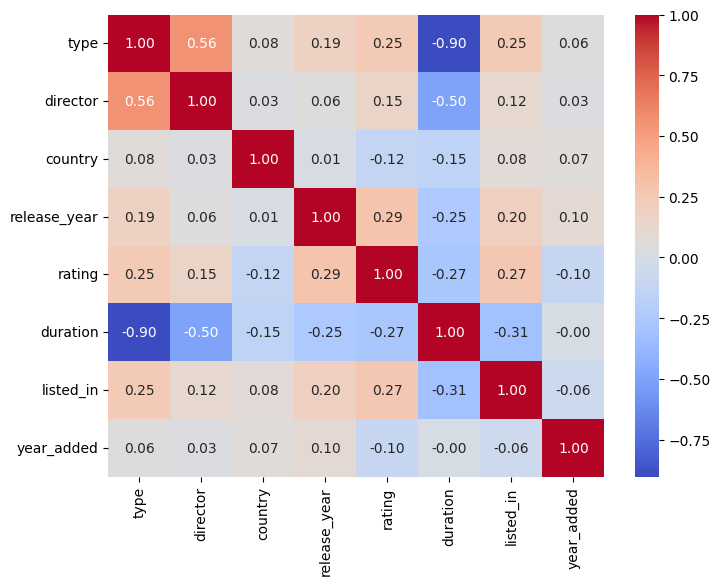

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

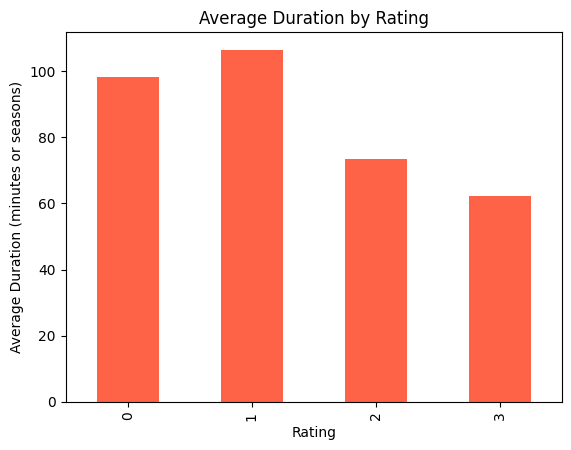

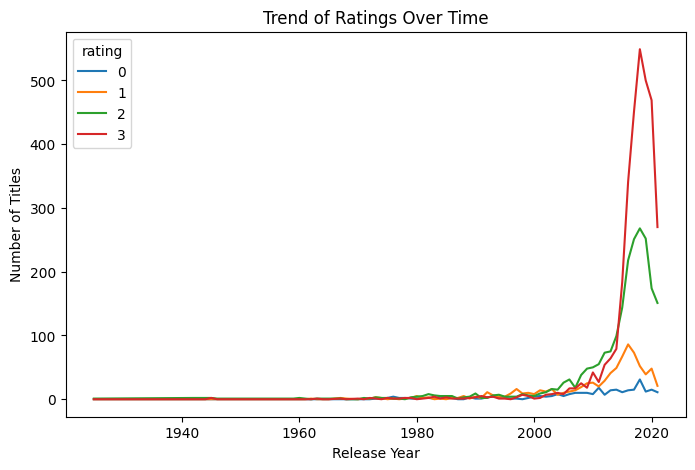

In [10]:
avg_dur = df.groupby('rating')['duration'].mean()
avg_dur.plot(kind='bar', color='tomato')
plt.title('Average Duration by Rating')
plt.ylabel('Average Duration (minutes or seasons)')
plt.xlabel('Rating')
plt.show()

yearly = df.groupby(['release_year', 'rating']).size().unstack(fill_value = 0)
yearly.plot(kind='line', figsize=(8,5))
plt.title('Trend of Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()